In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
#     print(coordinate[0], coordinate[1])

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kikwit
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | leshukonskoye
Processing Record 8 of Set 1 | puerto carreno
Processing Record 9 of Set 1 | te anau
Processing Record 10 of Set 1 | heinola
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | sao desiderio
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | ekhabi
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | sao jose da coroa grande
Processing Rec

In [16]:
len(city_data)

556

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kikwit,-5.0410,18.8162,77.16,25,85,2.75,CD,2022-07-11 20:27:51
1,Cidreira,-30.1811,-50.2056,68.36,78,65,9.73,BR,2022-07-11 20:27:52
2,Atuona,-9.8000,-139.0333,77.67,75,40,16.53,PF,2022-07-11 20:27:52
3,Barrow,71.2906,-156.7887,37.42,93,100,18.41,US,2022-07-11 20:27:53
4,Dikson,73.5069,80.5464,37.44,91,99,9.19,RU,2022-07-11 20:27:53
5,Pevek,69.7008,170.3133,45.54,59,26,8.61,RU,2022-07-11 20:27:54
6,Leshukonskoye,64.8989,45.7622,69.06,70,74,5.03,RU,2022-07-11 20:27:54
7,Puerto Carreno,6.1890,-67.4859,87.78,62,40,4.61,CO,2022-07-11 20:27:55
8,Te Anau,-45.4167,167.7167,31.64,83,100,1.36,NZ,2022-07-11 20:27:56
9,Heinola,61.2056,26.0381,63.00,94,100,3.31,FI,2022-07-11 20:27:56


In [18]:
col_ord = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[col_ord]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kikwit,CD,2022-07-11 20:27:51,-5.0410,18.8162,77.16,25,85,2.75
1,Cidreira,BR,2022-07-11 20:27:52,-30.1811,-50.2056,68.36,78,65,9.73
2,Atuona,PF,2022-07-11 20:27:52,-9.8000,-139.0333,77.67,75,40,16.53
3,Barrow,US,2022-07-11 20:27:53,71.2906,-156.7887,37.42,93,100,18.41
4,Dikson,RU,2022-07-11 20:27:53,73.5069,80.5464,37.44,91,99,9.19
5,Pevek,RU,2022-07-11 20:27:54,69.7008,170.3133,45.54,59,26,8.61
6,Leshukonskoye,RU,2022-07-11 20:27:54,64.8989,45.7622,69.06,70,74,5.03
7,Puerto Carreno,CO,2022-07-11 20:27:55,6.1890,-67.4859,87.78,62,40,4.61
8,Te Anau,NZ,2022-07-11 20:27:56,-45.4167,167.7167,31.64,83,100,1.36
9,Heinola,FI,2022-07-11 20:27:56,61.2056,26.0381,63.00,94,100,3.31


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

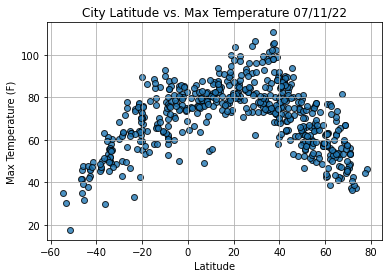

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


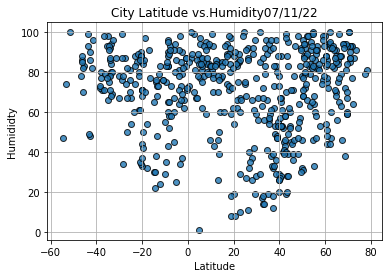

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Humidity"+ time.strftime("%x"))
plt.ylabel("Humididty")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


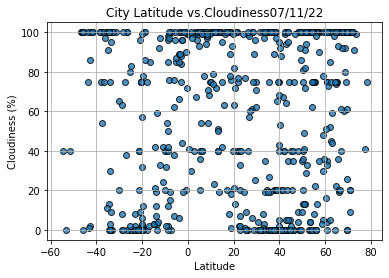

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Cloudiness"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()